<a href="https://colab.research.google.com/github/mvdheram/Stereotypical-Social-bias-detection-/blob/Data-collection-and-filtering/Exploratory_Data_Analysis_Social_Bias_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stereotypical Social Bias Exploratory Data Analysis   

Link : https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing dataset and few statistics

In [2]:
import pandas as pd

stereo = pd.read_csv('/content/drive/MyDrive/Trained_models/mult_label_dataset/Unrelated_samples_adjusted/Multi_label_stereo.csv',index_col=0)

In [3]:
stereo = stereo.loc[(stereo['bias_type'] != 'Nan') & (stereo['Type'] == 'stereotype')]

In [4]:
stereo.reset_index(drop=True,inplace=True)

In [5]:
stereo.drop(columns=['Type'], inplace=True)

In [6]:
stereo

,bias_type,sentence
0,Ethnicity,Many people live in Ethiopia. The people are v...
1,Ethnicity,My professor is a hispanic man He came here il...
2,gender,The schoolgirl is walking down the street. She...
3,Ethnicity,We'll likely fly over Cape Verde on our flight...
4,Ethnicity,I know many people who are Russian. They love ...
...,...,...
7129,religion,i wonder why the jewish media always pretends ...
7130,religion,its because the teachers are liberals and kike...
7131,religion,they should be forced to wear the hijab to sho...
7132,religion,it is an extremely cruel act against the poor ...


In [7]:
stereo.bias_type.describe()

count          7134
unique            4
top       Ethnicity
freq           2613
Name: bias_type, dtype: object

In [8]:
stereo.describe(include='all') 

,bias_type,sentence
count,7134,7134
unique,4,7109
top,Ethnicity,did jesus die a virgin of course not he got na...
freq,2613,2


In [9]:
stereo.describe()

,bias_type,sentence
count,7134,7134
unique,4,7109
top,Ethnicity,did jesus die a virgin of course not he got na...
freq,2613,2


In [10]:
stereo.bias_type.unique()

array(['Ethnicity', 'gender', 'profession', 'religion'], dtype=object)

In [11]:
stereo.bias_type.value_counts()

Ethnicity     2613
religion      1953
profession    1556
gender        1012
Name: bias_type, dtype: int64

In [12]:
stereo.bias_type.value_counts().sum()

7134

In [13]:
stereo.rename(columns={'sentence':'stereotype'},inplace=True)

In [14]:
stereo.describe()

,bias_type,stereotype
count,7134,7134
unique,4,7109
top,Ethnicity,did jesus die a virgin of course not he got na...
freq,2613,2


## Univariate graphical EDA

In [15]:
# Automate figure with data
def uniVariateBar(variable):
  for bias in stereo.bias_type.unique():
    bias_df = stereo[stereo.bias_type == bias]
    ax.bar(bias, bias_df[variable].mean(), yerr = bias_df[variable].std())

In [16]:
pip install seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def snsbarplot(x,y,x_label,y_label,title, save_fig):
  fig, ax = plt.subplots()
  sns.set(rc={'figure.figsize':(16.7,8.27)})
  # plt.style.use('sns')
  # fig.set(rc={'figure.figsize':(16.7,8.27)})
  ax = sns.barplot(x= x,y = y)
  ax.set_xlabel(x_label,fontsize=18)
  ax.set_ylabel(y_label,fontsize=18)
  ax.set_title(title, fontsize=18)
  plt.show()
  if save_fig == True:
    fig.savefig("/content/Lexicons"+title+'.png',quality = 100)

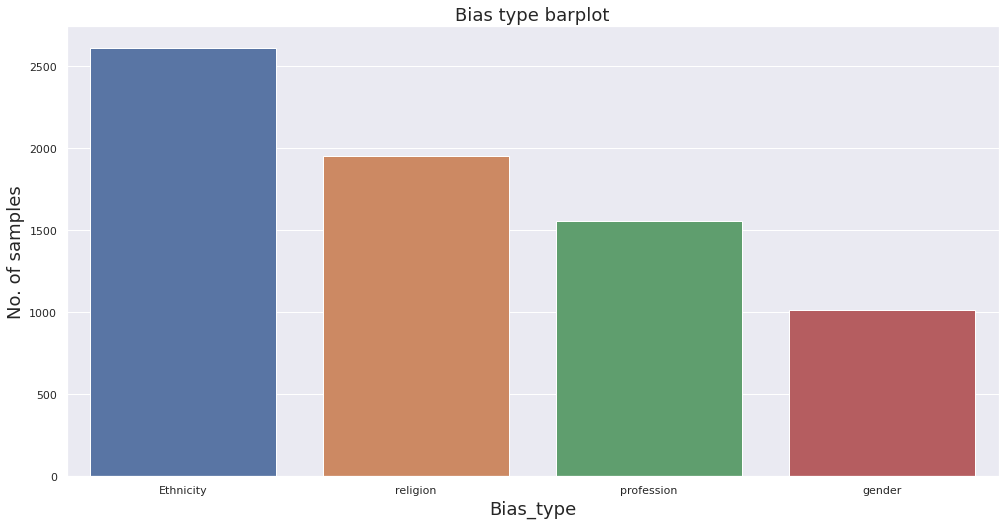

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = dict(stereo.bias_type.value_counts())
snsbarplot(list(counts.keys()),list(counts.values()),'Bias_type','No. of samples','Bias type barplot',True)

In [ ]:
# Number of words
def word_count(string):
  # split the string into words
  words = string.split()

  # Return length of words list
  return len(words)

stereo['num_words'] = stereo['stereotype'].apply(word_count)

In [ ]:
 # Number of characters
 stereo['num_chars']  = stereo['stereotype'].apply(len)

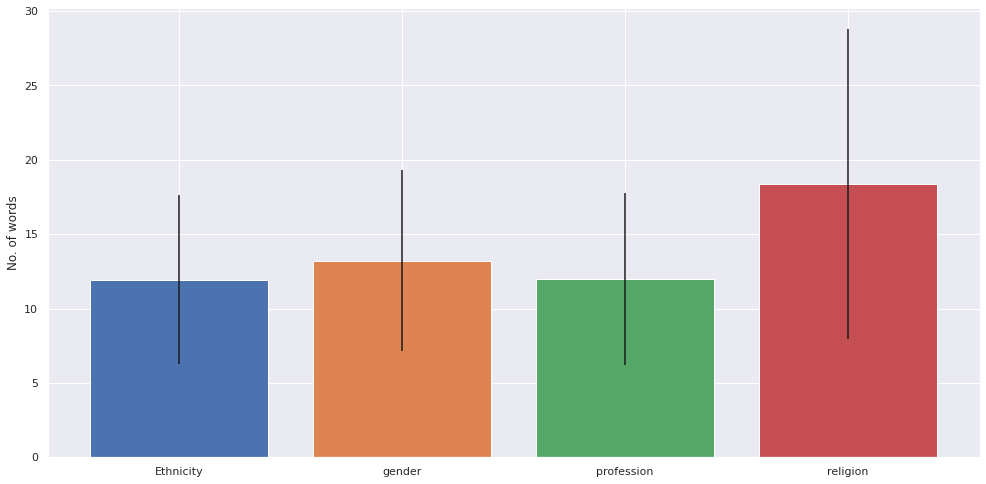

In [ ]:
fig,ax = plt.subplots()

sns.set(rc={'figure.figsize':(14,10)})
uniVariateBar('num_words')
ax.set_ylabel("No. of words")
ax.set_xticklabels(stereo.bias_type.unique())
# ax.set_title("num_words across bias types")
plt.show() 
fig.savefig('No_words.png', quality = 100)


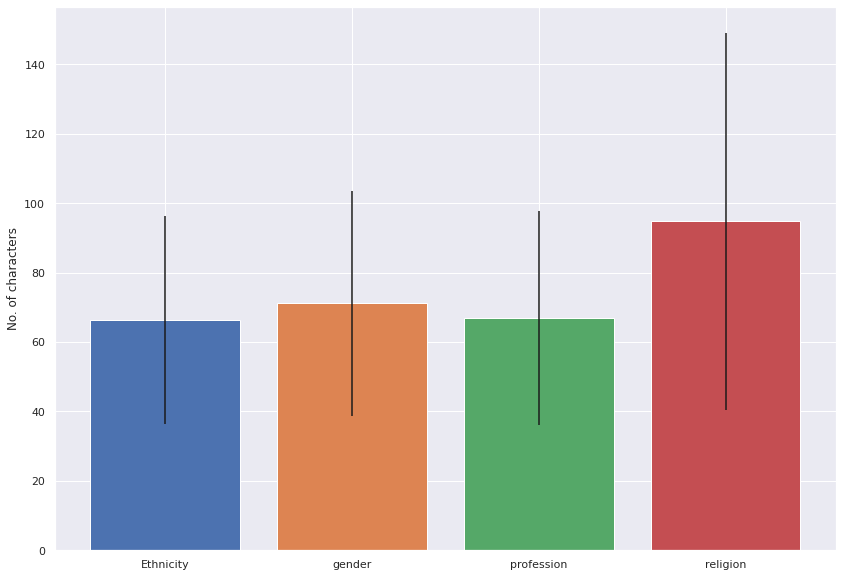

In [ ]:
fig,ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
uniVariateBar('num_chars')
ax.set_ylabel("No. of characters")
ax.set_xticklabels(stereo.bias_type.unique())
# ax.set_title("num_chars across bias types")
fig.savefig('No_of_chars.png', quality = 100)
plt.show() 

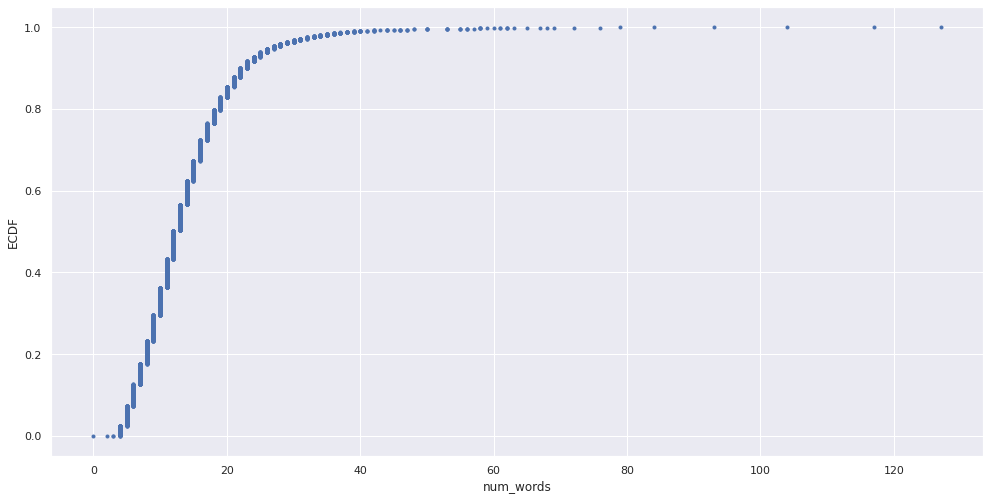

In [ ]:
import numpy as np

x = np.sort(stereo['num_words'])

y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x,y,marker = '.', linestyle = 'none')
_ = plt.xlabel('num_words')
_ = plt.ylabel('ECDF') 
plt.show()

### Text Readability

* A mathematical formula utilizing word, syllabel and sentence count to determine readability of english passage.

**Flesch reading ease**:

  * Scale :
    * 0 - 30 : College graduate level readability 
    * 90 - 100 : 5th grade level readability
  * Higher the score, the better the readability.
  * Factors taken into consideration :
    1. Greater the average sentence length, harder the text to read
    2. Greater the average number of syllables, harder the text to read



In [ ]:
pip install textstat

     |████████████████████████████████| 101 kB 3.4 MB/s 
     |████████████████████████████████| 2.0 MB 40.2 MB/s 


In [ ]:
# Readability tests using textatistic library 
# Import the textatistic class
import textstat
import math
def readability_scores(text):
  # if text.endswith(".") == False:
  #   text = text+"."
  return textstat.flesch_reading_ease(text)

In [ ]:
try:
  stereo['flesch_score'] = stereo['stereotype'].apply(readability_scores)
except ZeroDivisionError:
  stereo['flesch_score'] = 0

In [ ]:
stereo['flesch_score']

0       89.24
1       52.87
2       89.75
3       86.71
4       91.27
        ...  
1948    71.48
1949    36.97
1950    80.62
1951    65.05
1952    80.62
Name: flesch_score, Length: 7134, dtype: float64

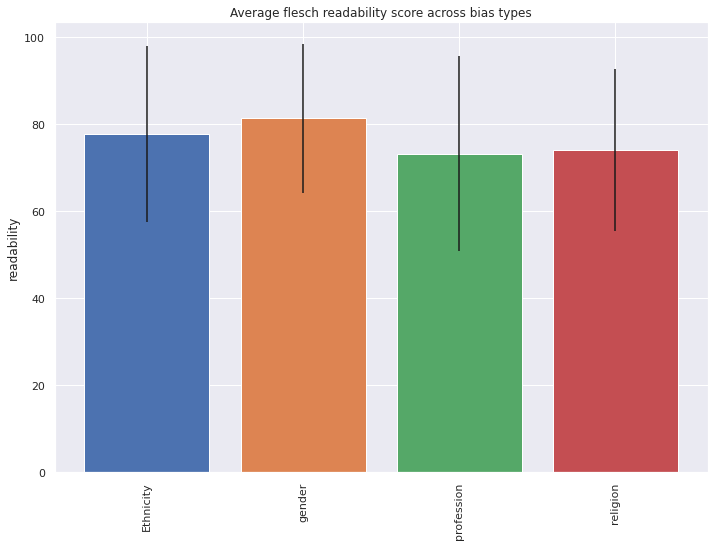

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig,ax = plt.subplots()
uniVariateBar('flesch_score')
ax.set_ylabel("readability")
ax.set_title("Average flesch readability score across bias types")
ax.set_xticklabels(stereo.bias_type.unique(),rotation = 90)
plt.show()
fig.savefig('flesch_score.png', quality = 100)  

### Vader sentiment analysis

* "VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media."
* Sensitive to both polarity and intensity of sentimens
* Calculates positive, negative neutral sentiment score along with compound score which is 'normalized, weighted composite score' based on valence score of each lexicon.
  * Threshold of 0.05 for classifying into pos, neg, neu based on compund score.

In [18]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.3 MB/s 


In [19]:
# Sentiment analysis 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def vader_sentiment(text):
  score = analyser.polarity_scores(text)
  return score

senti = stereo['stereotype'].apply(vader_sentiment) 
stereo = pd.concat([stereo,(pd.DataFrame.from_dict(dict(senti).values()))],axis = 1, sort = False)

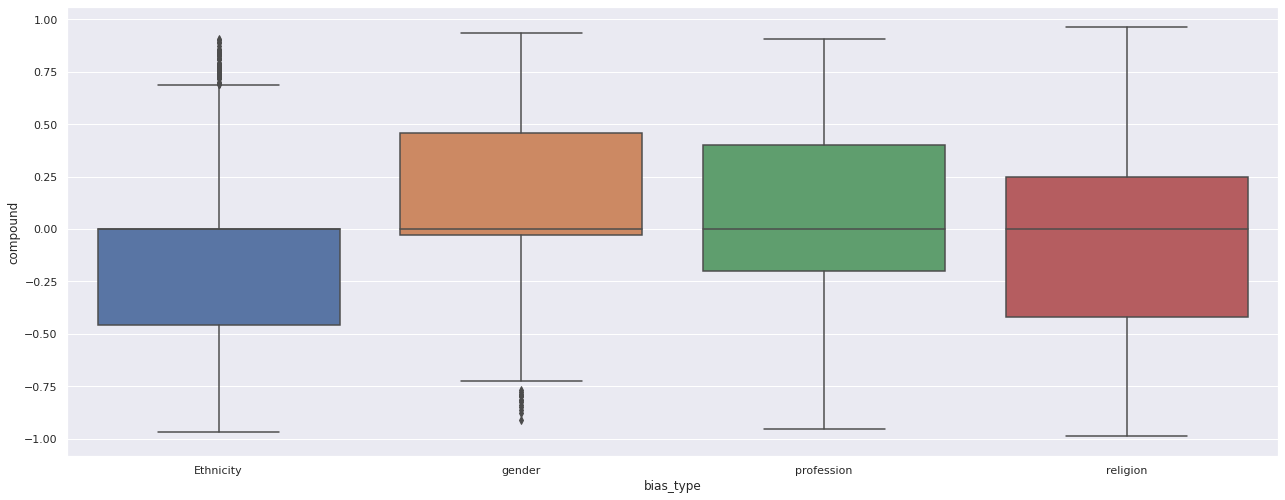

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(21.7,8.27)})
fig,ax = plt.subplots()
ax = sns.boxplot(x='bias_type', y = 'compound', data = stereo)
fig.savefig('sentiment_scores_boxplot.png', quality = 100) 

In [ ]:
def flag_compound(compund):
  if compund > 0.05:
    return 'pos'
  elif compund <-0.05 :
    return 'neg'
  elif (compund > -0.05) & (compund < 0.05) :
    return 'neu'
stereo['compound'] = stereo['compound'].apply(flag_compound)
stereo.head()

,bias_type,stereotype,neg,neu,pos,compound
0,Ethnicity,Many people live in Ethiopia. The people are v...,0.000,0.816,0.184,pos
1,Ethnicity,My professor is a hispanic man He came here il...,0.000,1.000,0.000,neu
2,gender,The schoolgirl is walking down the street. She...,0.000,1.000,0.000,neu
3,Ethnicity,We'll likely fly over Cape Verde on our flight...,0.105,0.759,0.135,pos
4,Ethnicity,I know many people who are Russian. They love ...,0.000,0.690,0.310,pos


In [ ]:
stereo.iloc[:,2:].describe()

,neg,neu,pos
count,7134.000000,7134.000000,7134.000000
mean,0.098394,0.812923,0.088543
std,0.140415,0.165480,0.132832
min,0.000000,0.000000,0.000000
25%,0.000000,0.693000,0.000000
50%,0.000000,0.816000,0.000000
75%,0.185750,1.000000,0.167000
max,0.783000,1.000000,0.704000


In [ ]:
counts = dict(stereo.compound.value_counts())

In [ ]:
counts.keys()

dict_keys(['neg', 'neu', 'pos'])

In [ ]:
counts.values()

dict_values([2506, 2409, 2219])

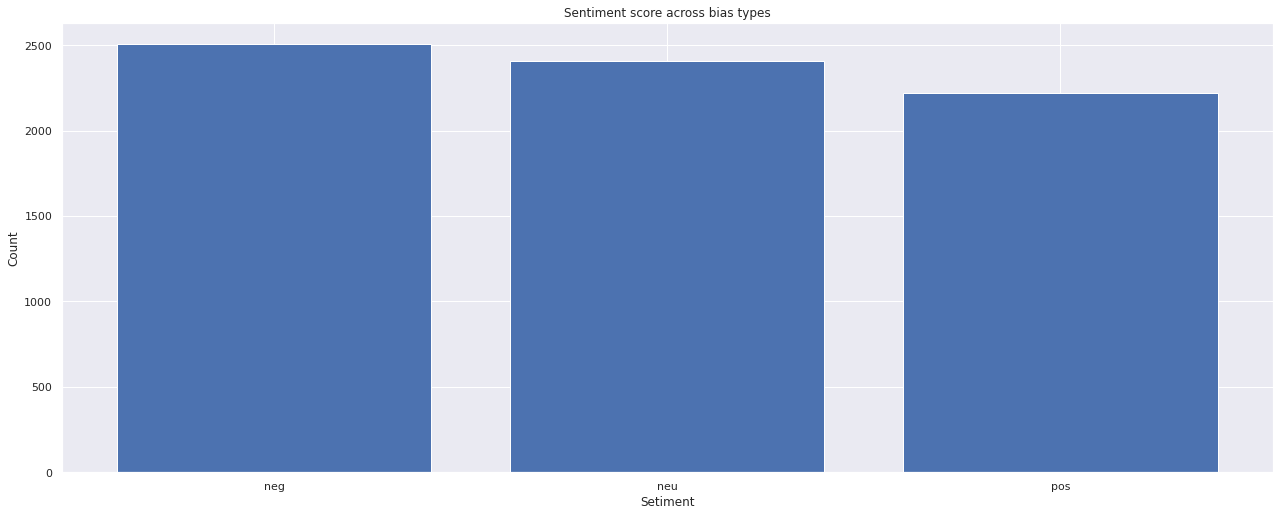

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
ax.bar(counts.keys(),counts.values())
ax.set_ylabel("Count")
ax.set_xlabel("Setiment")
ax.set_title("Sentiment score across bias types")
plt.show() 

boxplot

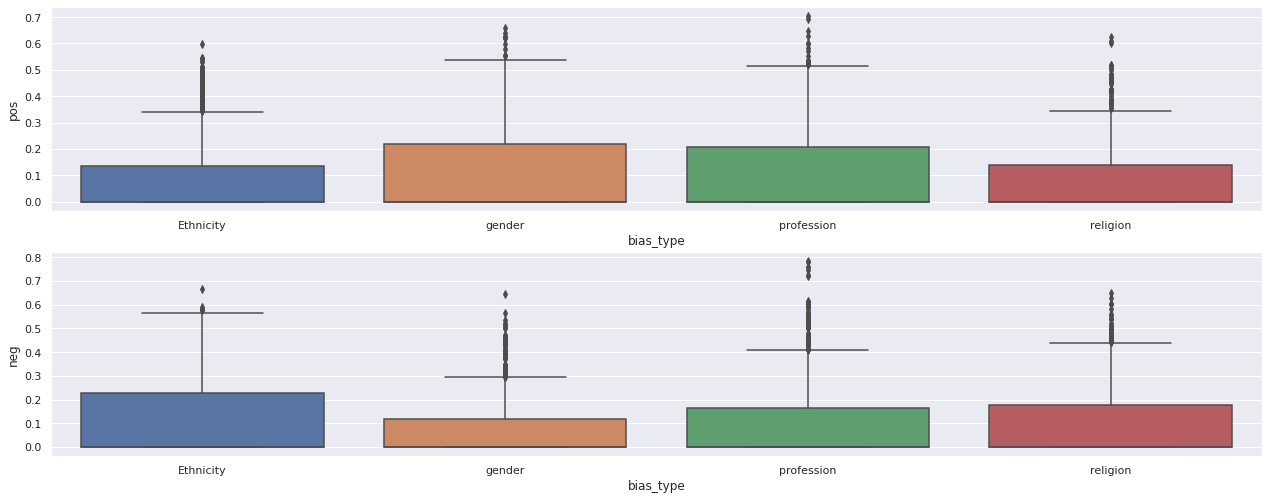

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(21.7,8.27)})
fig,ax = plt.subplots(2,1)
ax[0] = sns.boxplot(x='bias_type', y = 'pos', data = stereo, ax = ax[0])
ax[1] = sns.boxplot(x='bias_type', y = 'neg', data = stereo, ax = ax[1])
# import matplotlib.pyplot as plt
# import seaborn as snsplt.show()
fig.savefig('sentiment_scores_boxplot.png', quality = 100)  

### Most common words POS and NER tags

Spacy POS tag list : https://github.com/explosion/spaCy/blob/master/spacy/glossary.py 

In [ ]:
pip install -U pip setuptools wheel

In [ ]:
# Tokenization using spacy
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize(text):  

  doc = nlp(text)
  tokens = [token.text.lower() for token in doc]
  return tokens

def lemmatization(text):

  doc = nlp(text)
  lemmas = [token.lemma_.lower() for token in doc]
  return lemmas

# Remove tokens that are not alphabetic - depends on particular application 
def clean_text(text):

  lemmas = lemmatization(text)
  a_lemmas = [lemma for  lemma in lemmas
              if lemma.isalpha()]
  
  return (' '.join(a_lemmas))


# Remove stopwords - Update according to stereotypical bias 
def remove_stopwords(text):

  stopwords = spacy.lang.en.stop_words.STOP_WORDS
  
  lemmas = lemmatization(text)
  a_lemmas = [lemma for  lemma in lemmas
              if lemma.isalpha() and lemma not in stopwords]
  
  return (' '.join(a_lemmas))


# Parts of speech tagger 
def pos_tags(text):
  
  doc = nlp(text)
  pos = [(token.text, token.tag_) for token in doc]
  return (pos)


# Named entity recognition 
def ner_tags(text):
  
  doc = nlp(text)
  ner = [(ent.text, ent.label_) for ent in doc.ents]
  return (ner)

In [ ]:
stereo['clean_text'] = stereo['stereotype'].apply(clean_text)

In [ ]:
stereo['pos_tags'] = stereo['clean_text'].apply(pos_tags) 

In [ ]:
stereo['lemmatized_withStopwords']= stereo['clean_text'].apply(remove_stopwords)

In [ ]:
stereo['lemma_pos'] = stereo['lemmatized_withStopwords'].apply(pos_tags)

In [ ]:
stereo['Ner_tags'] = stereo['clean_text'].apply(ner_tags)

In [ ]:
stereo

,bias_type,stereotype,neg,neu,pos,compound,clean_text,pos_tags,lemmatized_withStopwords,lemma_pos,Ner_tags
0,Ethnicity,Many people live in Ethiopia. The people are v...,0.000,0.816,0.184,pos,many people live in ethiopia the people be ver...,"[(many, JJ), (people, NNS), (live, VBP), (in, ...",people live ethiopia people thin good distance...,"[(people, NNS), (live, VBP), (ethiopia, NNP), ...","[(ethiopia, GPE)]"
1,Ethnicity,My professor is a hispanic man He came here il...,0.000,1.000,0.000,neu,professor be a hispanic man come here illegally,"[(professor, NNP), (be, VB), (a, DT), (hispani...",professor hispanic man come illegally,"[(professor, NNP), (hispanic, NNP), (man, NN),...","[(hispanic, NORP)]"
2,gender,The schoolgirl is walking down the street. She...,0.000,1.000,0.000,neu,the schoolgirl be walk down the street be a ta...,"[(the, DT), (schoolgirl, NN), (be, VBP), (walk...",schoolgirl walk street target child predator,"[(schoolgirl, NNP), (walk, NNP), (street, NNP)...",[]
3,Ethnicity,We'll likely fly over Cape Verde on our flight...,0.105,0.759,0.135,pos,will likely fly over cape verde on flight tomo...,"[(will, MD), (likely, RB), (fly, VB), (over, I...",likely fly cape verde flight tomorrow bet peop...,"[(likely, RB), (fly, VB), (cape, NN), (verde, ...","[(tomorrow, DATE)]"
4,Ethnicity,I know many people who are Russian. They love ...,0.000,0.690,0.310,pos,know many people who be russian love vodka,"[(know, VBP), (many, JJ), (people, NNS), (who,...",know people russian love vodka,"[(know, VBP), (people, NNS), (russian, JJ), (l...","[(russian, NORP)]"
...,...,...,...,...,...,...,...,...,...,...,...
7129,religion,i wonder why the jewish media always pretends ...,0.318,0.682,0.000,neg,i wonder why the jewish media always pretend t...,"[(i, PRP), (wonder, VBP), (why, WRB), (the, DT...",wonder jewish media pretend blood thirsty worl...,"[(wonder, NN), (jewish, JJ), (media, NN), (pre...","[(jewish, NORP), (third, ORDINAL)]"
7130,religion,its because the teachers are liberals and kike...,0.172,0.639,0.189,pos,because the teacher be liberal and kike who kn...,"[(because, IN), (the, DT), (teacher, NN), (be,...",teacher liberal kike know true european value ...,"[(teacher, NN), (liberal, JJ), (kike, NNS), (k...","[(european, NORP), (european, NORP)]"
7131,religion,they should be forced to wear the hijab to sho...,0.167,0.833,0.000,neg,should be force to wear the hijab to show that...,"[(should, MD), (be, VB), (force, NN), (to, TO)...",force wear hijab different,"[(force, NN), (wear, VBP), (hijab, JJ), (diffe...",[]
7132,religion,it is an extremely cruel act against the poor ...,0.255,0.745,0.000,neg,be an extremely cruel act against the poor vod...,"[(be, VB), (an, DT), (extremely, RB), (cruel, ...",extremely cruel act poor vodka bottle force sp...,"[(extremely, RB), (cruel, JJ), (act, NN), (poo...",[]


In [ ]:
from collections import Counter
import itertools

def most_common(n, part_of_speech = 'NNS',text = stereo.pos_tags):
  pos_type = []
  # Combining lists of lists into single list 
  pos_list = list(itertools.chain.from_iterable(list(text)))
  for word,tag in pos_list :
    if tag == part_of_speech:
      pos_type.append(word)
  pos_counts = Counter(pos_type)
  return pos_counts.most_common(n)

#### 20 Most common Adjective

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,"JJ"))))

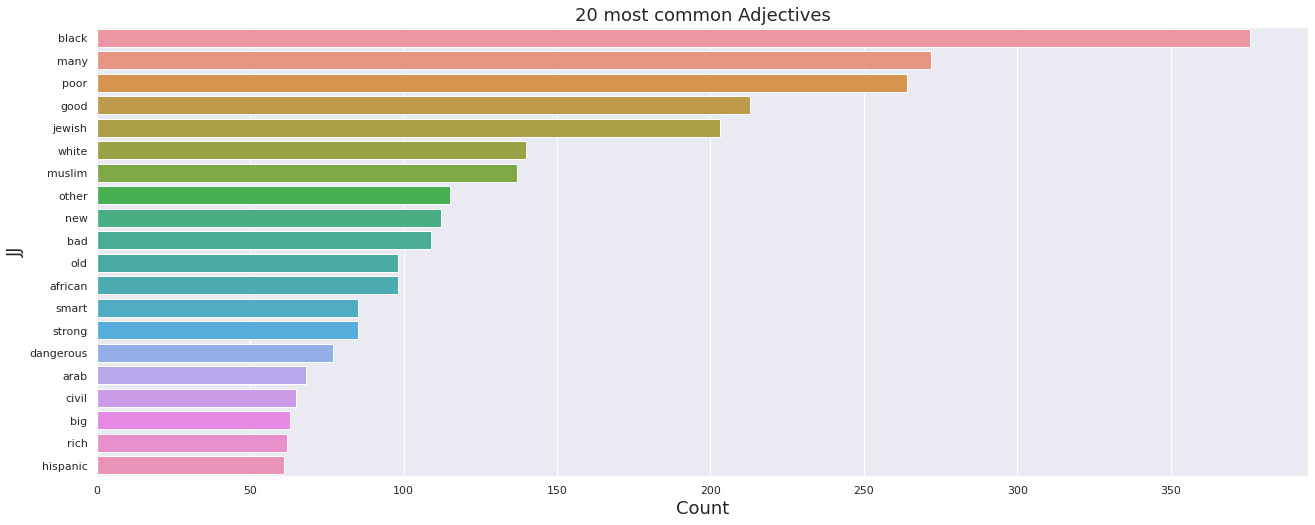

In [ ]:
snsbarplot(freq,word,'Count','JJ','20 most common Adjectives',True)

#### 20 Most common Generic Nouns (NNS,NNPS)

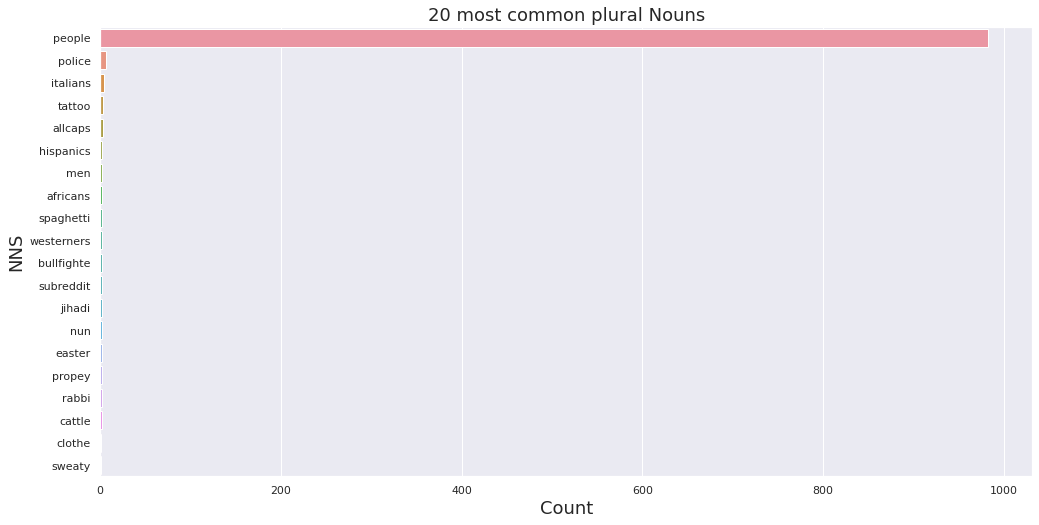

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,'NNS'))))
snsbarplot(freq,word,'Count','NNS','20 most common plural Nouns',True)

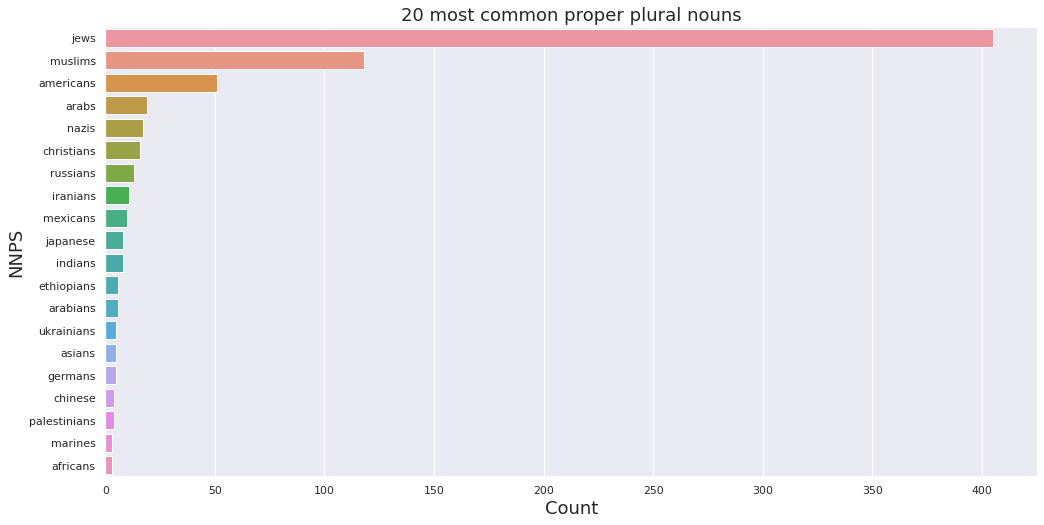

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,'NNPS'))))
snsbarplot(freq,word,'Count','NNPS','20 most common proper plural nouns',True)

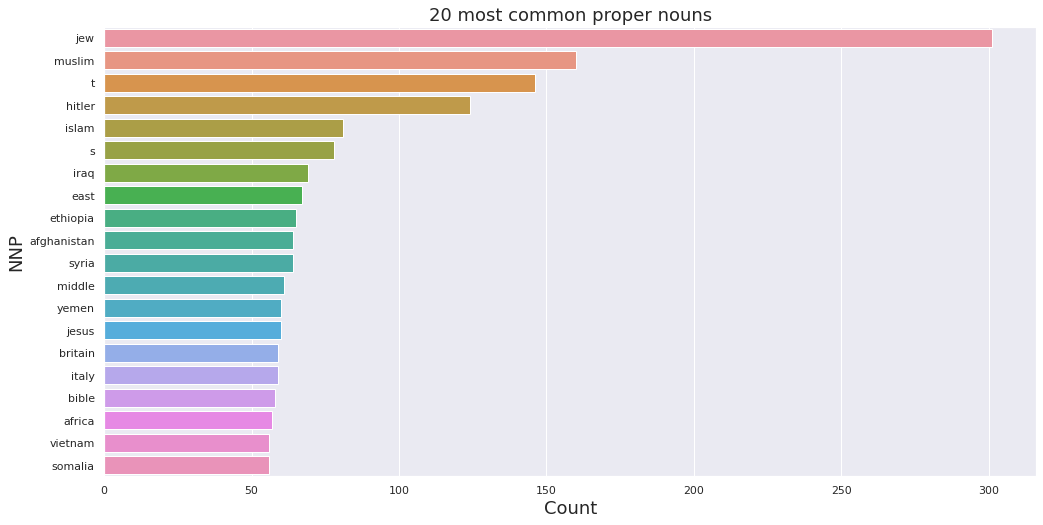

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,'NNP'))))
snsbarplot(freq,word,'Count','NNP','20 most common proper nouns',True)

#### 20 most common determiners (DT)

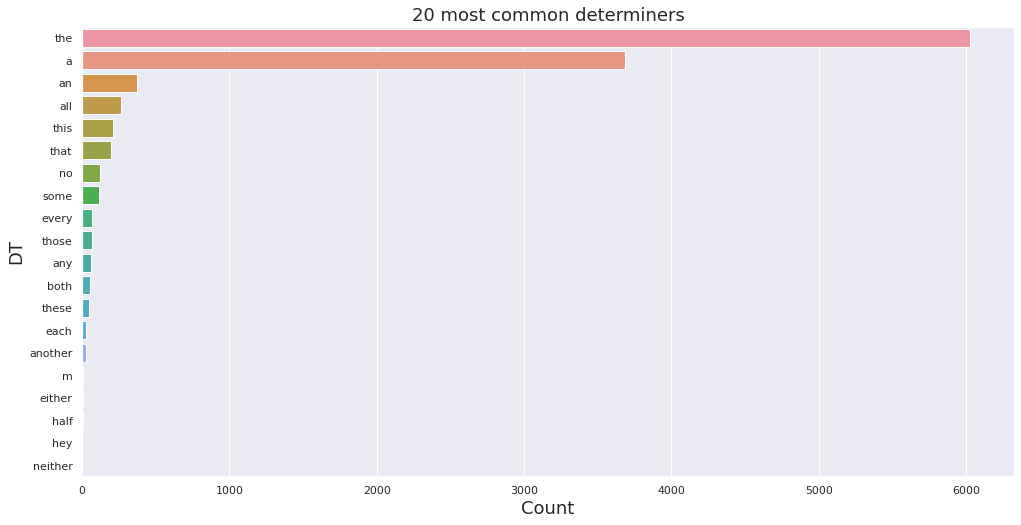

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,'DT'))))
snsbarplot(freq,word,'Count','DT','20 most common determiners',True)

Remark:

* **the** with adjectives, to refer to a whole group of people.

#### 20 most common adjective (comparative, superlative)

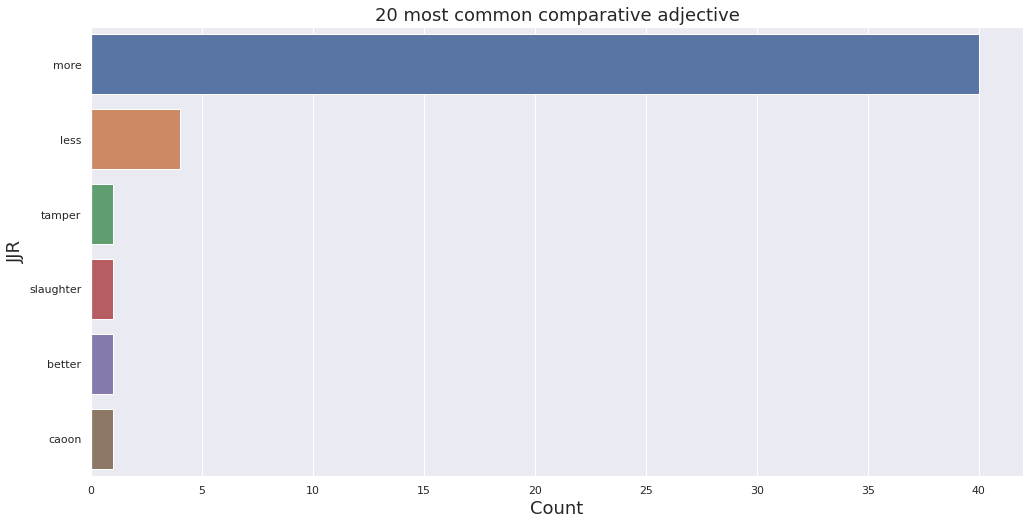

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,"JJR"))))
snsbarplot(freq,word,'Count','JJR','20 most common comparative adjective',True)

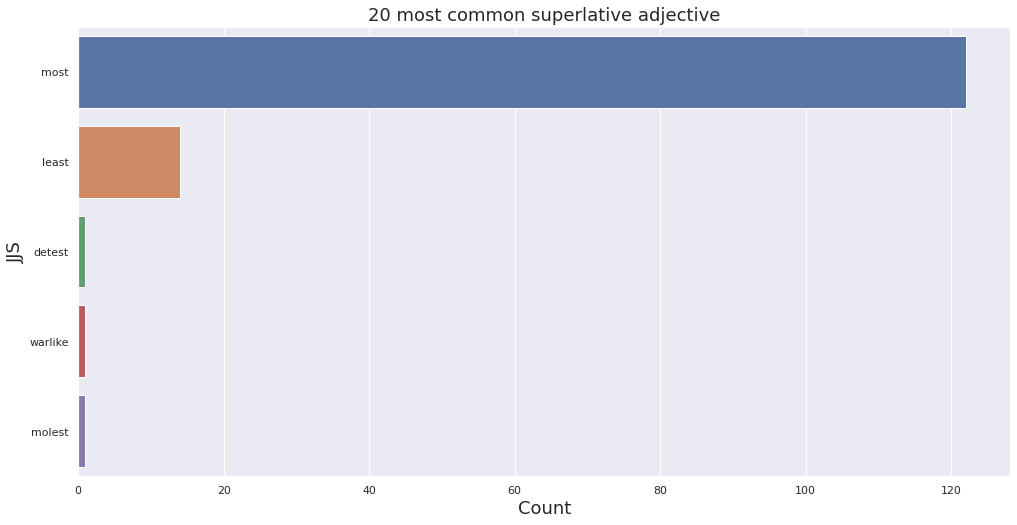

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,"JJS"))))
snsbarplot(freq,word,'Count',"JJS",'20 most common superlative adjective',True)

#### NER tags

Tag list : https://spacy.io/api/annotation#named-entities

In [ ]:
def most_common_NER(text,ent,n):
  ner_type = []
  # Combining lists of lists into single list 
  NER_list = list(itertools.chain.from_iterable(list(text)))
  for word,tag in NER_list :
    if tag == ent:
      ner_type.append(word)
  ner_counts = Counter(ner_type)
  return ner_counts.most_common(n)

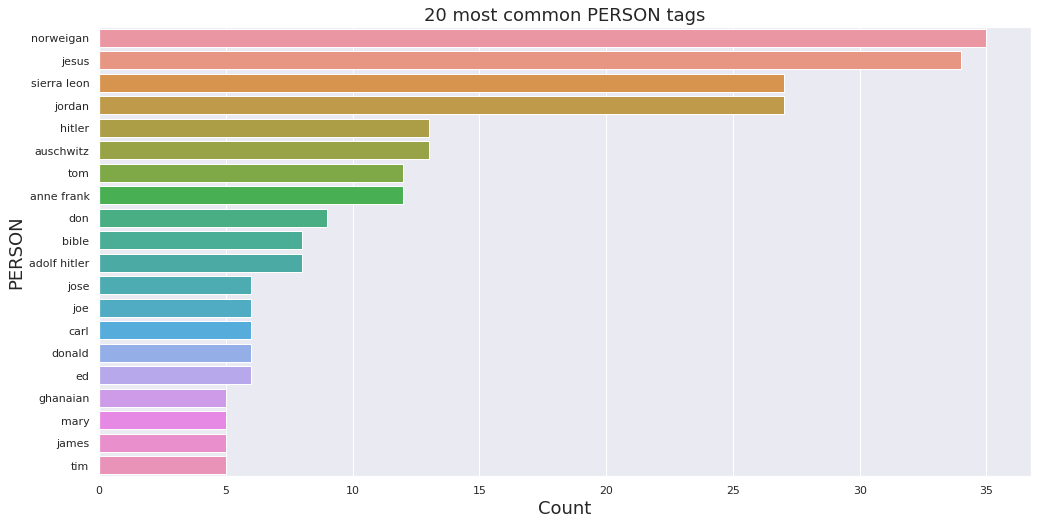

In [ ]:
word, freq  = list(map(list,zip(*most_common_NER(stereo.Ner_tags,'PERSON',20))))
snsbarplot(freq,word,'Count','PERSON','20 most common PERSON tags',True)

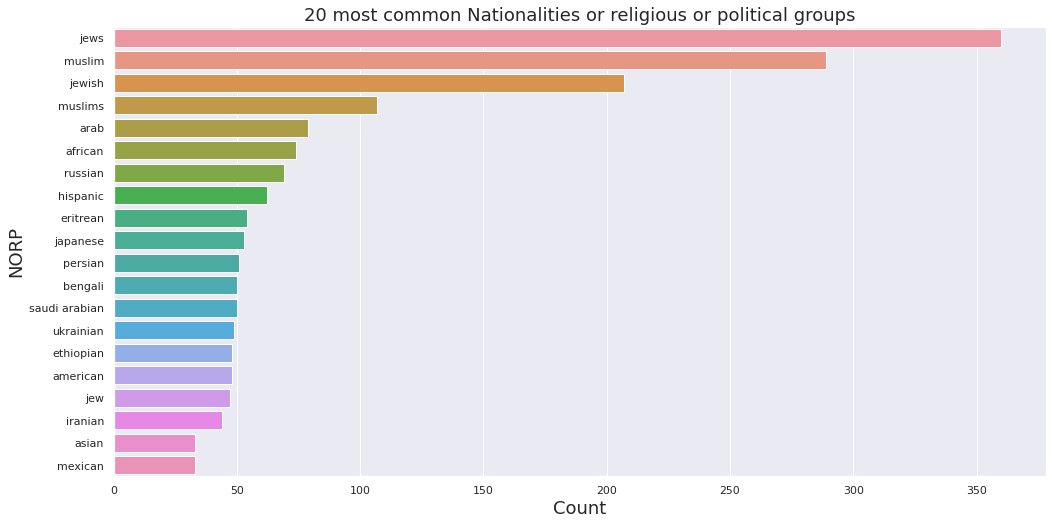

In [ ]:
word, freq  = map(list,zip(*most_common_NER(stereo.Ner_tags,'NORP',20)))
snsbarplot(freq,word,'Count','NORP','20 most common Nationalities or religious or political groups',True)

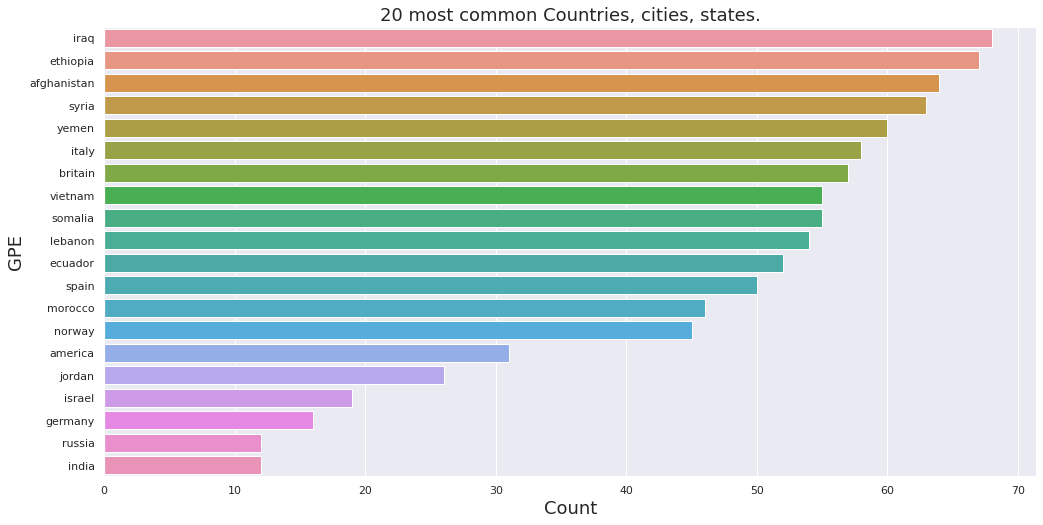

In [ ]:
word, freq  = list(map(list,zip(*most_common_NER(stereo.Ner_tags,'GPE',20))))
snsbarplot(freq,word,'Count','GPE','20 most common Countries, cities, states.',True)

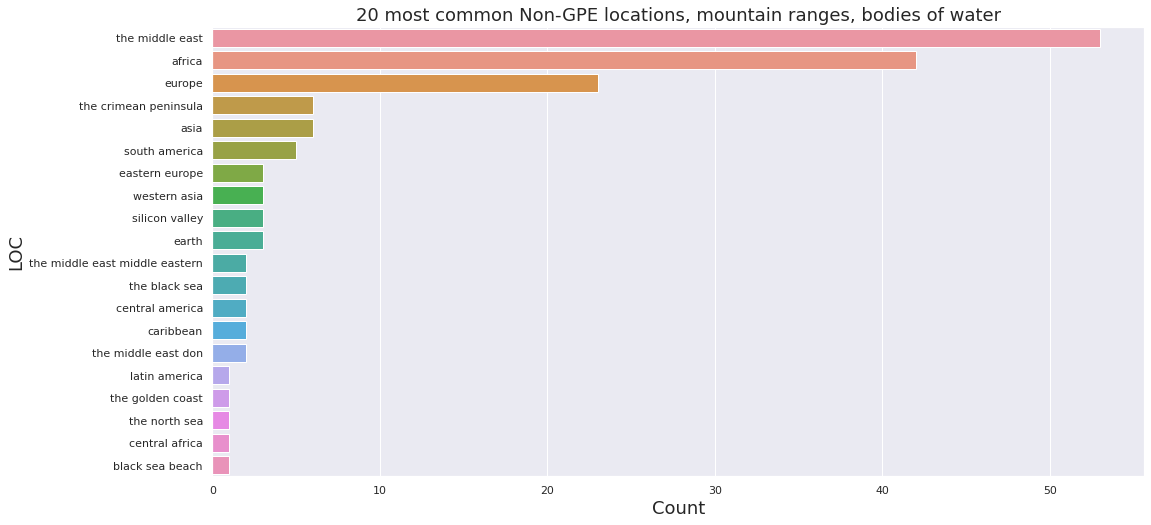

In [ ]:
word, freq  = map(list,zip(*most_common_NER(stereo.Ner_tags,'LOC',20)))
snsbarplot(freq,word,'Count','LOC','20 most common Non-GPE locations, mountain ranges, bodies of water',True)

### Top n-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Building n-gram models - capture context
# Range = (2,2) - bi-grams, (1,3) - unigram, bigram, trigram
def n_grams(range, corpus):
  # Bag of words feature - docxterm matrix 
  vectorizer = CountVectorizer(ngram_range = range)
  bow_matrix = vectorizer.fit_transform(corpus)
  sum_words = bow_matrix.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:10]

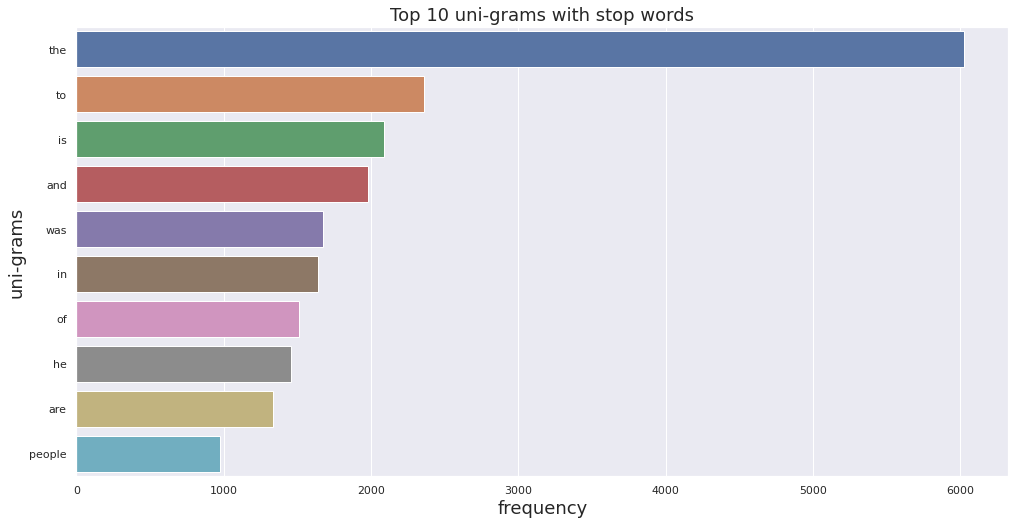

In [ ]:
word, freq  = map(list,zip(*n_grams((1,1),stereo.stereotype)))
snsbarplot(freq,word,'frequency','uni-grams','Top 10 uni-grams with stop words',True)

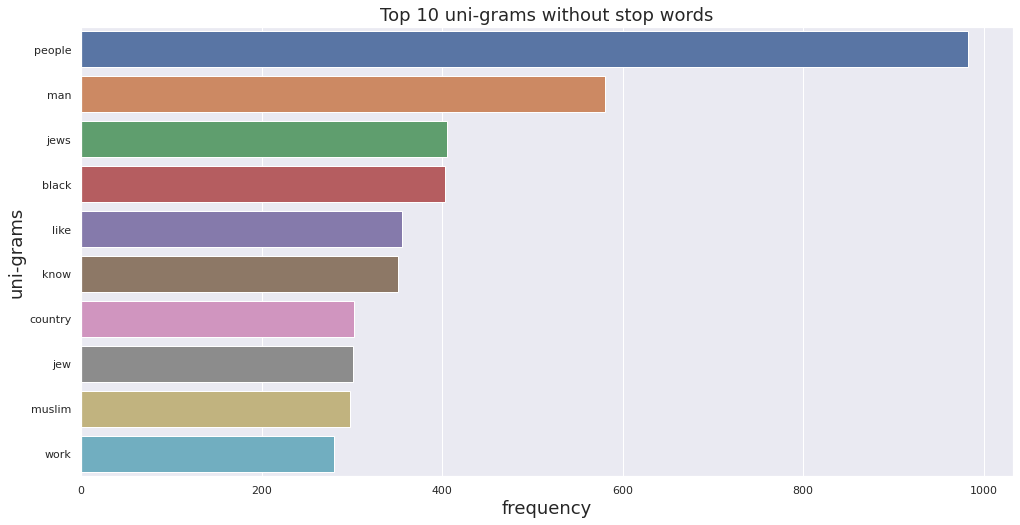

In [ ]:
word, freq  = map(list,zip(*n_grams((1,1),stereo.lemmatized_withStopwords)))
snsbarplot(freq,word,'frequency','uni-grams','Top 10 uni-grams without stop words',True)

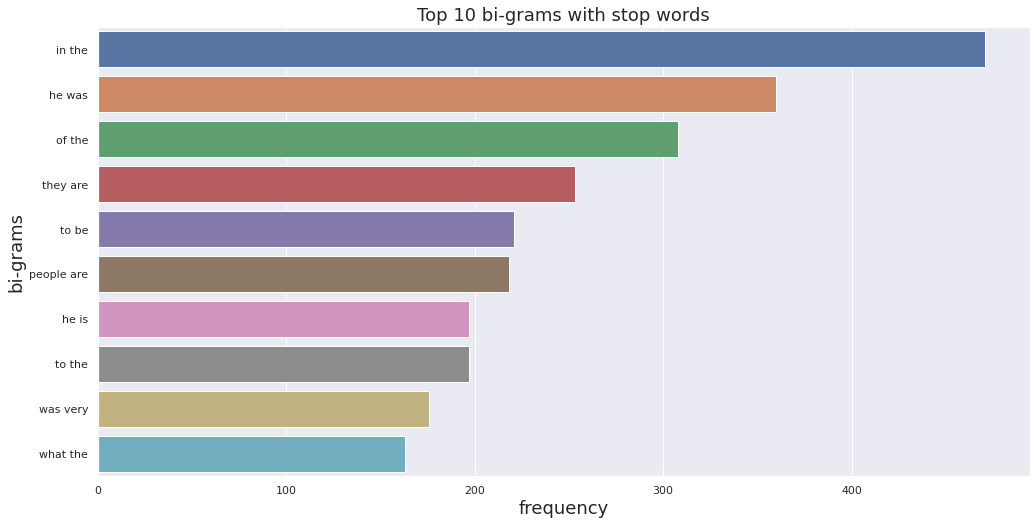

In [ ]:
word, freq  = map(list,zip(*n_grams((2,2),stereo.stereotype)))
snsbarplot(freq,word,'frequency','bi-grams','Top 10 bi-grams with stop words',True)

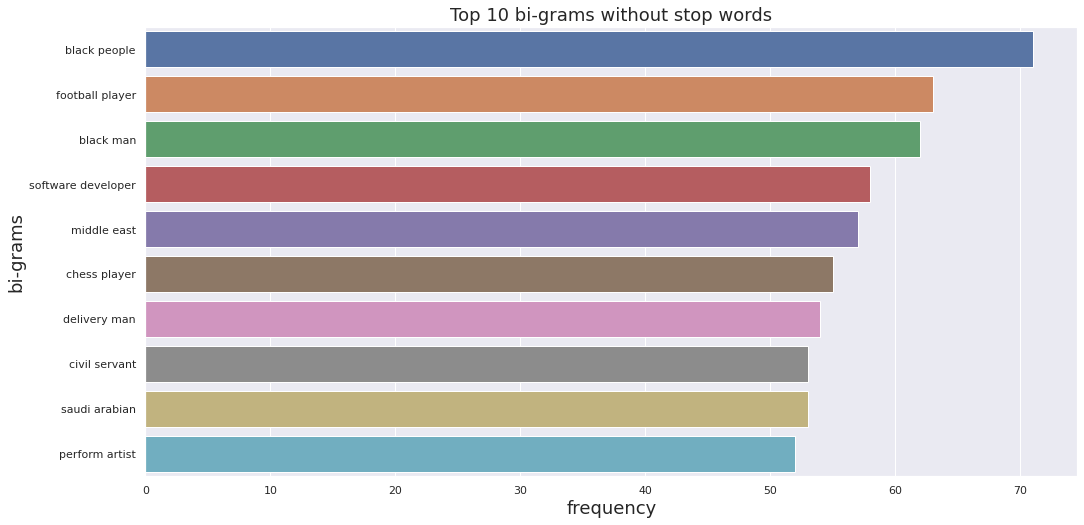

In [ ]:
word, freq  = map(list,zip(*n_grams((2,2),stereo.lemmatized_withStopwords)))
snsbarplot(freq,word,'frequency','bi-grams','Top 10 bi-grams without stop words',True)

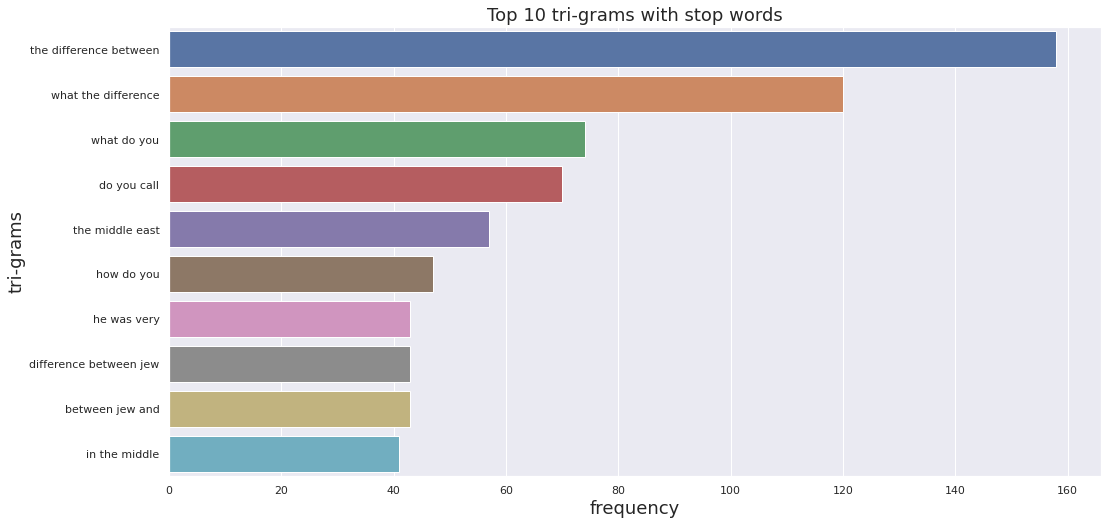

In [ ]:
word, freq  = map(list,zip(*n_grams((3,3),stereo.stereotype)))
snsbarplot(freq,word,'frequency','tri-grams','Top 10 tri-grams with stop words',True)

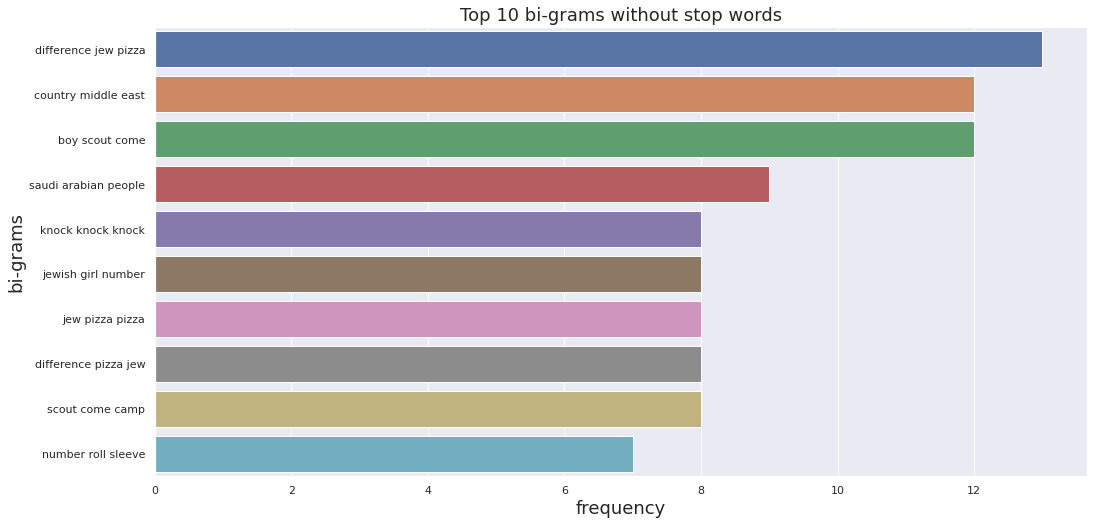

In [ ]:
word, freq  = map(list,zip(*n_grams((3,3),stereo.lemmatized_withStopwords)))
snsbarplot(freq,word,'frequency','bi-grams','Top 10 bi-grams without stop words',True)

### WordCloud

In [ ]:
features = pd.read_csv('/content/Explicit_stereo_features.csv',index_col = 0)

In [ ]:
def create_wordcloud(bias_type,column, save_fig ):# Libraries
  from wordcloud import WordCloud
  import matplotlib.pyplot as plt
  import itertools

  # Create a list of word
  bias_type_terms = stereo.loc[stereo['bias_type'] == bias_type,column]
  text= str(list(bias_type_terms))

  # Create the wordcloud object
  wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.margins(x=0, y=0)
  plt.show()
  if save_fig == True:
    fname = '/content/Wordclouds/'+bias_type+'.png'
    print(fname)
    plt.savefig(fname, quality = 100)

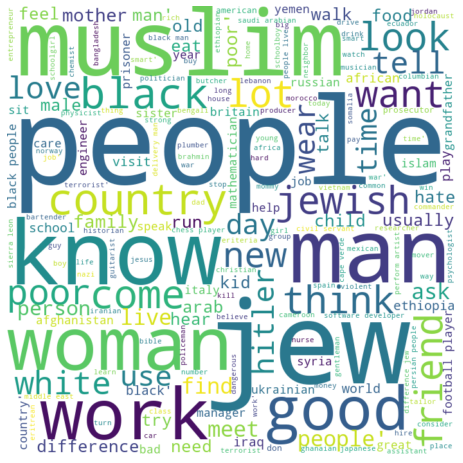

<Figure size 1202.4x595.44 with 0 Axes>

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text= str(list(stereo.lemmatized_withStopwords))

# Create the wordcloud object
wordcloud = WordCloud(width=700, height=700, margin=0,background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
plt.savefig('wordcoud.png', quality = 100)

#### Word cloud per bias type

##### Ethnicity

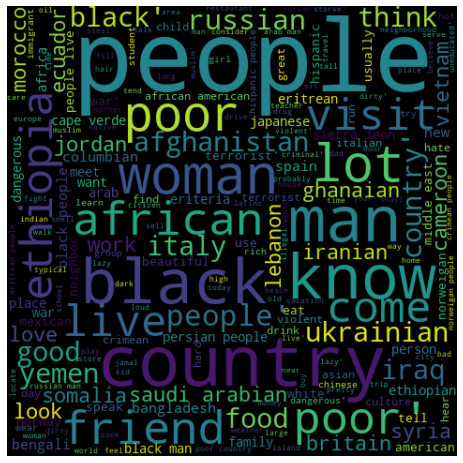

<Figure size 1202.4x595.44 with 0 Axes>

In [ ]:
create_wordcloud('Ethnicity','lemmatized_withStopwords', True)

##### Profession

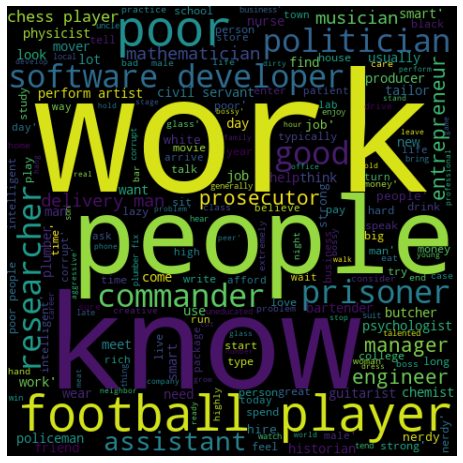

/content/Wordclouds/profession.png


<Figure size 1202.4x595.44 with 0 Axes>

In [ ]:
create_wordcloud('profession','lemmatized_withStopwords',True)

##### Gender

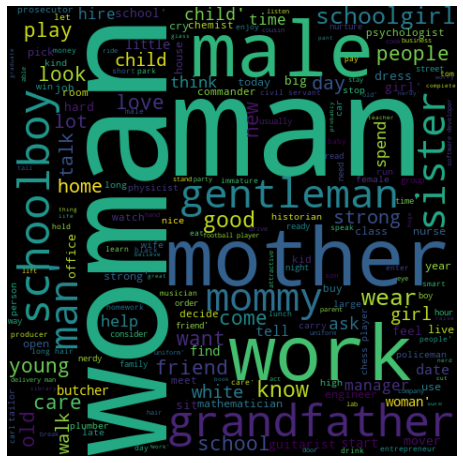

/content/Wordclouds/gender.png


<Figure size 1202.4x595.44 with 0 Axes>

In [ ]:
create_wordcloud('gender','lemmatized_withStopwords',True)

##### Religion

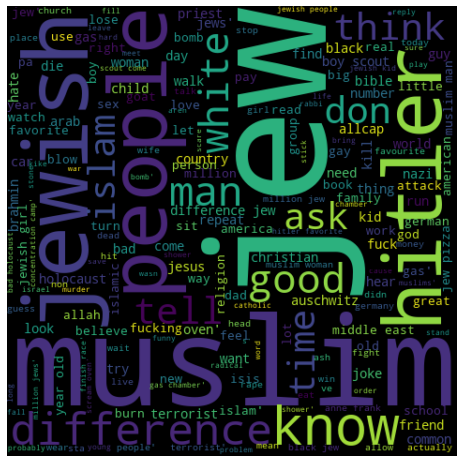

/content/Wordclouds/religion.png


<Figure size 1202.4x595.44 with 0 Axes>

In [ ]:
create_wordcloud('religion','lemmatized_withStopwords',True)

### Finding characteristic terms and their association using Scaled f-score 

scattertext : A tool for finding distinguishing terms in corpora

Link: https://github.com/JasonKessler/scattertext#using-scattertext-as-a-text-analysis-library-finding-characteristic-terms-and-their-associations

#### Keyterms for entire corpus

In [ ]:
pip install scattertext

     |████████████████████████████████| 7.3 MB 4.6 MB/s 
     |████████████████████████████████| 24.0 MB 85 kB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=2dfc985d775870cf80e230008c57e4682ae0d6f229572befdfb090d466bb006b
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import scattertext as st
import spacy
from pprint import pprint
import pandas as pd

In [ ]:
stereo = pd.read_csv('/content/explicitbias.csv',index_col = 0)

#### Following are the terms that differentiate the stereotype text from a general English corpus :

In [ ]:
corpus = st.CorpusFromPandas(stereo, category_col='bias_type', text_col='stereotype', nlp=nlp).build()

In [ ]:
x = pd.DataFrame(corpus.get_scaled_f_scores_vs_background())

In [ ]:
x

,corpus,background,Scaled f-score
eriteria,48.0,0.0,0.000967
allcaps,41.0,0.0,0.000826
norweigan,48.0,46910.0,0.000657
eritrean,50.0,229521.0,0.000304
brahmin,42.0,207872.0,0.000274
...,...,...,...
gendarmes,0.0,63449.0,0.000000
gendarmerie,0.0,91732.0,0.000000
gendarmenmarkt,0.0,20518.0,0.000000
gendarme,0.0,123613.0,0.000000


#### Keyterms for each bias type

Ethnicity

In [ ]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Ethnicity_score'] = corpus.get_scaled_f_scores('Ethnicity')
pprint(list(term_freq_df.sort_values(by='Ethnicity_score', ascending=False).index[:20]))

['ethiopia',
 'italy',
 'somalia',
 'sierra',
 'lebanon',
 'japanese',
 'morocco',
 'bangladesh',
 'ecuador',
 'ghanaian',
 'persian',
 'leon',
 'spain',
 'cameroon',
 'sierra leon',
 'eritrean',
 'persian people',
 'crimean',
 'bengali',
 'norweigan']


In [ ]:
Ethnicity_list = list(term_freq_df.sort_values(by='Ethnicity_score', ascending=False).index[:20])

Profession             


In [ ]:
term_freq_df = corpus.get_term_freq_df()          
term_freq_df['Profession_score'] = corpus.get_scaled_f_scores('profession')
pprint(list(term_freq_df.sort_values(by='Profession_score', ascending=False).index[:20]))

['performing artist',
 'performing',
 'researcher',
 'politician',
 'assistant',
 'bartender',
 'developer',
 'football player',
 'software',
 'software developer',
 'the software',
 'delivery man',
 'the delivery',
 'producer',
 'delivery',
 'servant',
 'civil servant',
 'the prisoner',
 'musician',
 'player']


In [ ]:
profession_list = list(term_freq_df.sort_values(by='Profession_score', ascending=False).index[:20])

gender                 


In [ ]:
term_freq_df = corpus.get_term_freq_df()          
term_freq_df['gender_score'] = corpus.get_scaled_f_scores('gender')
pprint(list(term_freq_df.sort_values(by='gender_score', ascending=False).index[:20]))

['gentlemen',
 'schoolboy',
 'schoolgirl',
 'the schoolboy',
 'mommy',
 'the gentlemen',
 'herself',
 'the schoolgirl',
 'grandfather',
 'mother',
 'my grandfather',
 'sister',
 'himself',
 'grandfather is',
 'my mother',
 'caring',
 'nurturing',
 'my sister',
 'male',
 'a male']


In [ ]:
gender_list = list(term_freq_df.sort_values(by='gender_score', ascending=False).index[:20])

religion


In [ ]:
term_freq_df = corpus.get_term_freq_df()          
term_freq_df['religion_score'] = corpus.get_scaled_f_scores('religion')
pprint(list(term_freq_df.sort_values(by='religion_score', ascending=False).index[:20]))

['difference between',
 's the',
 'what s',
 'between a',
 'you call',
 'it s',
 'the jews',
 'don',
 'don t',
 'jesus',
 'n',
 'oven',
 'jew and',
 'repeat',
 'why do',
 'a jewish',
 'n t',
 'difference',
 'the difference',
 'jews']


In [ ]:
religion_list = list(term_freq_df.sort_values(by='religion_score', ascending=False).index[:20])

### Toxicity(TBD)

In [ ]:
pip install detoxify

In [ ]:
import pandas as pd

toxicityDf = pd.read_csv('/content/explicitbias.csv',index_col = 0)

In [ ]:
# Toxicity identification 
from detoxify import Detoxify
import math

def toxicity(text):
  results = Detoxify('original').predict(text)
  return math.floor(results['toxicity']*100)

toxicityDf['toxicity'] = toxicityDf['stereotype'].apply(toxicity)
toxicityDf.to_csv('/content/Explicit_stereo_features.csv') 

### Lexicons from paper :

* Linguistic models for analyzing and detecting social bias

In [ ]:
import pandas as pd
import json

lexicon_features = pd.read_csv('/content/explicitbias.csv',index_col = 0)

In [ ]:
f = open('/content/Subjectivity_lexicon.json')

lexicons = json.load(f)

In [ ]:
for keys, value in lexicons.items():
  print(keys,'->',len(tokenize(value)))

assertive_verbs.txt -> 132
bias_lexicon.txt -> 1326
bias_word_list_01_2018.txt -> 19496
factive_verbs.txt -> 55
hedges_hyland2005.txt -> 231
implicative_verbs.txt -> 63
report_verbs.txt -> 362
subjectivityClues_lexicon.txt -> 16844


In [ ]:
lexicon_features['tokenize'] = lexicon_features['stereotype'].apply(tokenize)

In [ ]:
# def check_lexicon(text):
#   for keys in lexicons.keys():
#     key = pre_process(str(keys))
#     for token in key :
#       if token in text:
#         return token
#       else:
#         continue
#     return 0

In [ ]:
stereo.columns

Index(['bias_type', 'stereotype', 'neg', 'neu', 'pos', 'compound',
       'clean_text', 'pos_tags', 'lemmatized_withStopwords', 'lemma_pos',
       'Ner_tags'],
      dtype='object')

In [ ]:
stereo['tokenize'] = stereo['stereotype'].apply(tokenize)

#### Assertive_verbs

In [ ]:
lexicon = set(tokenize(lexicons['assertive_verbs.txt']))

In [ ]:
def check_lexicon(text):
    for token in lexicon:
      if token in text:
        return token
      else:
        continue
    return 0

In [ ]:
stereo['assertive_verbs'] = stereo['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((stereo.loc[stereo['assertive_verbs']!= 0,'assertive_verbs']).value_counts())

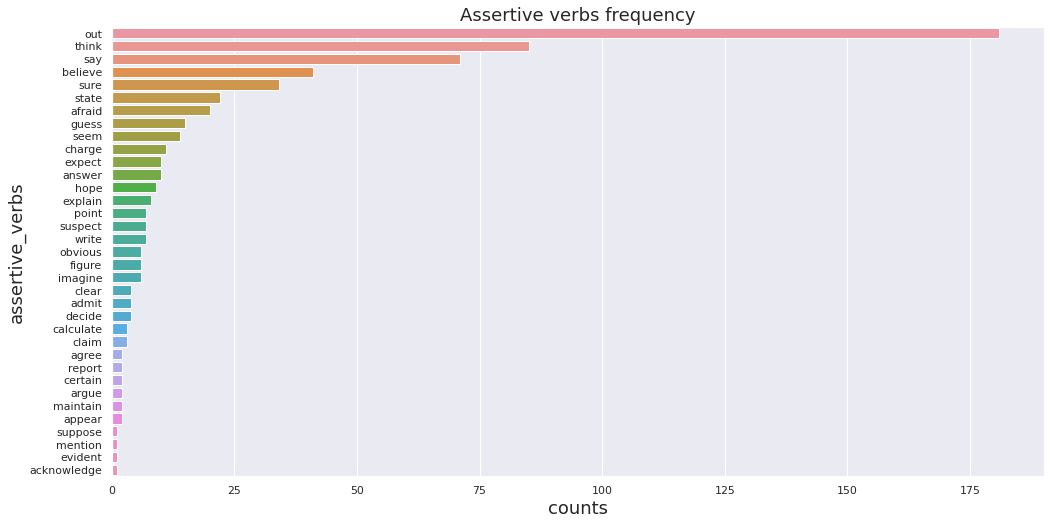

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','assertive_verbs','Assertive verbs frequency',True)

In [ ]:
counts = dict((stereo.loc[stereo['assertive_verbs']!= 0,'bias_type']).value_counts())

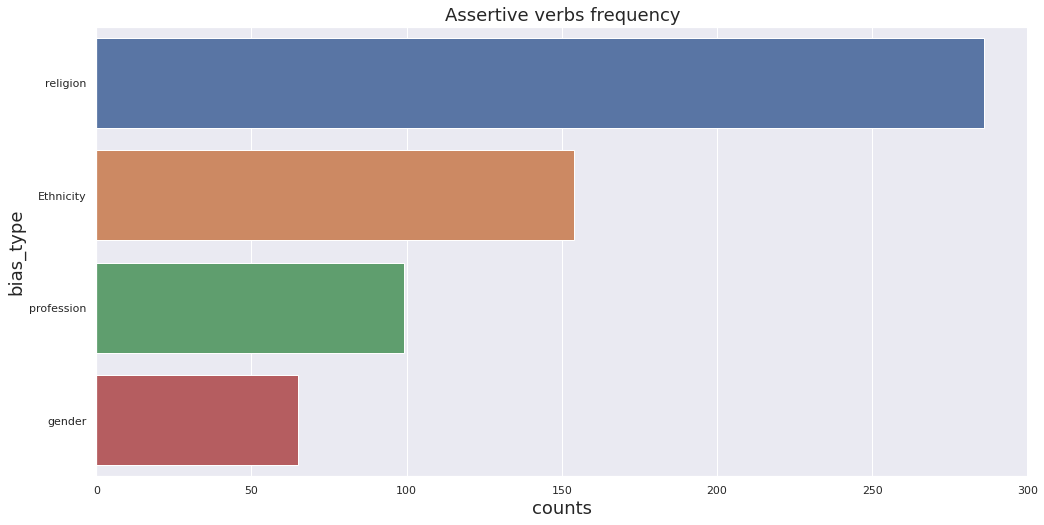

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','bias_type','Assertive verbs frequency',True)

#### Factive_verbs

In [ ]:
lexicon = set(tokenize(lexicons['factive_verbs.txt']))

In [ ]:
stereo['factive_verbs'] = stereo['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((stereo.loc[stereo['factive_verbs']!= 0,'factive_verbs']).value_counts())

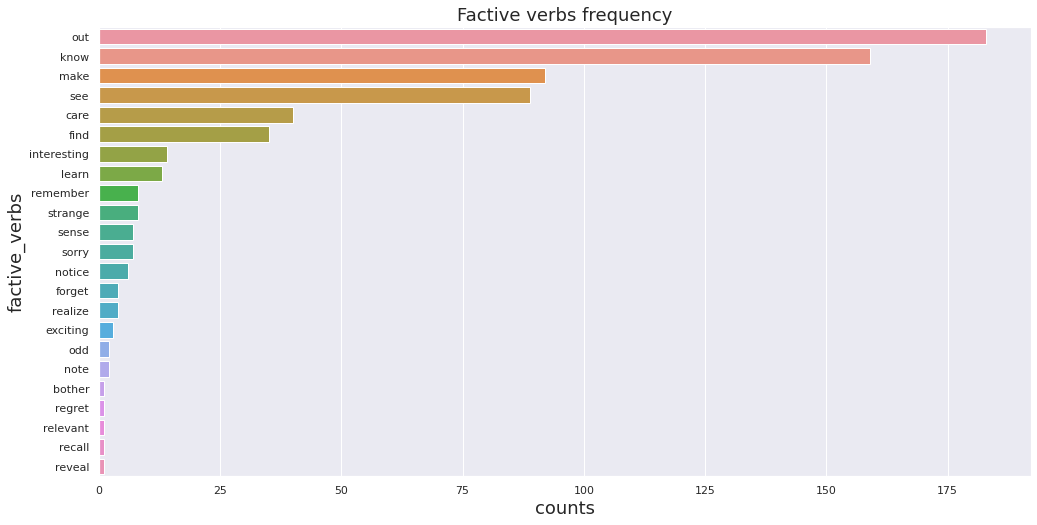

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','factive_verbs','Factive verbs frequency',True)

In [ ]:
counts = dict((stereo.loc[stereo['factive_verbs']!= 0,'bias_type']).value_counts())

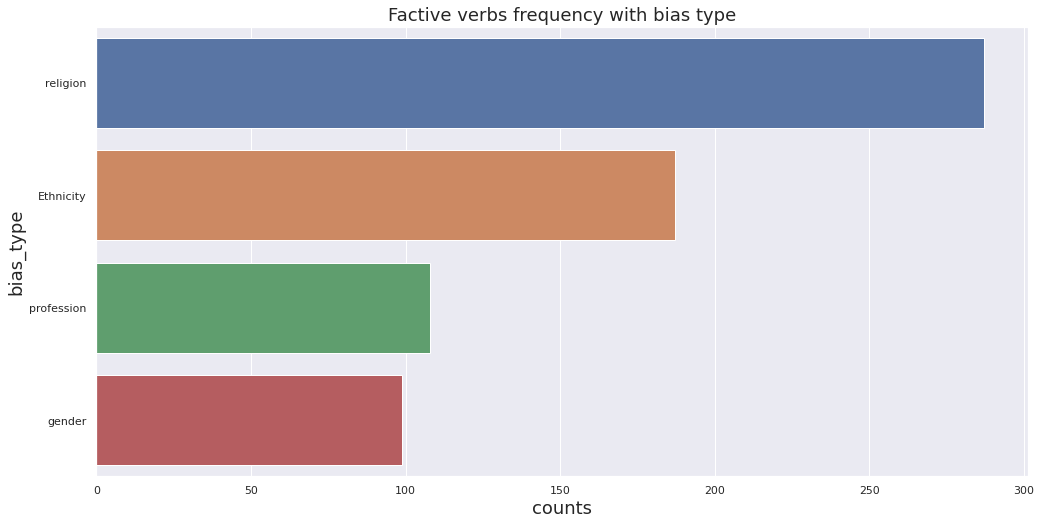

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','bias_type','Factive verbs frequency with bias type',True)

#### Hedges

In [ ]:
lexicon = set(tokenize(lexicons['hedges_hyland2005.txt']))

In [ ]:
stereo['hedges_hyland2005'] = stereo['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((stereo.loc[stereo['hedges_hyland2005']!= 0,'hedges_hyland2005']).value_counts())

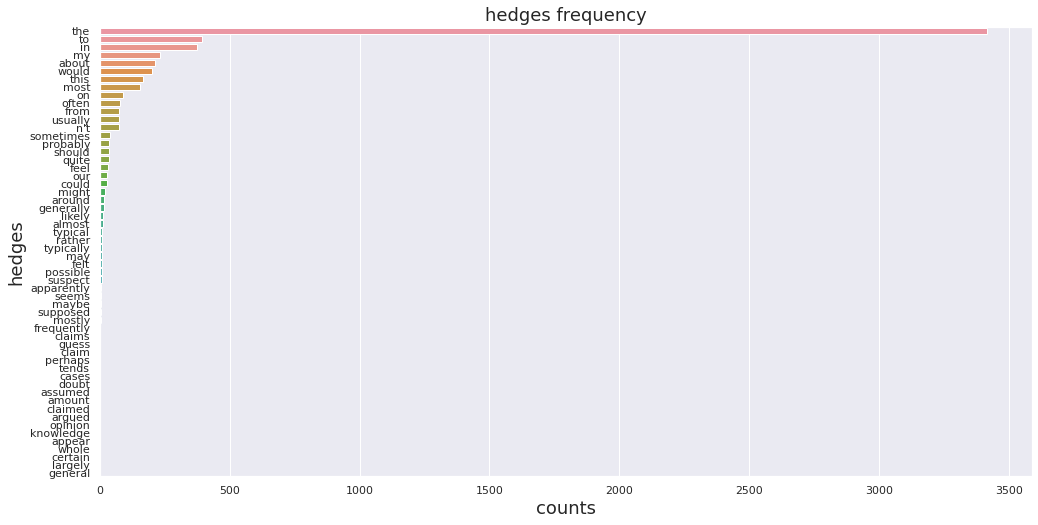

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','hedges','hedges frequency',True)

In [ ]:
counts = dict((stereo.loc[stereo['hedges_hyland2005']!= 0,'bias_type']).value_counts())

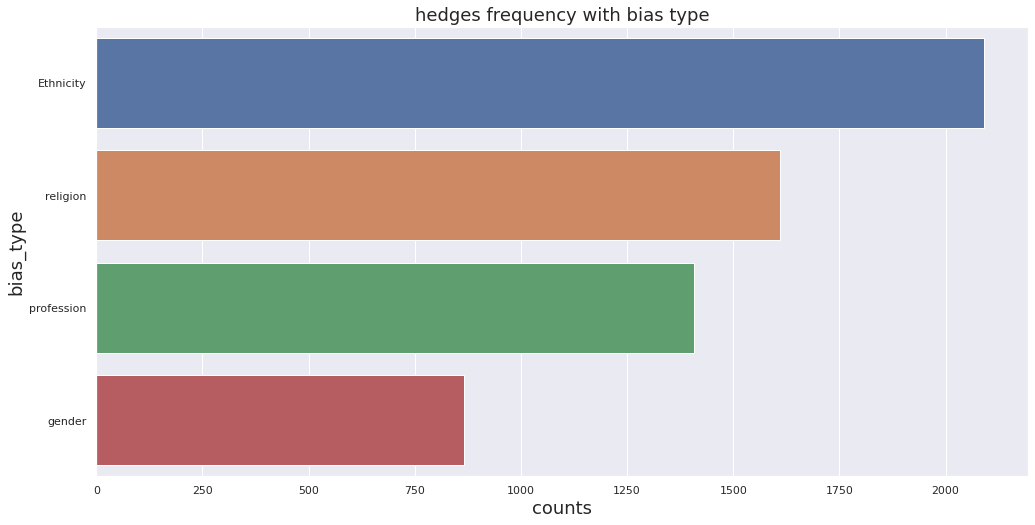

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','bias_type','hedges frequency with bias type',True)

#### Implicative_verbs

In [ ]:
lexicon = set(tokenize(lexicons['implicative_verbs.txt']))

In [ ]:
stereo['implicative_verbs'] = stereo['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((stereo.loc[stereo['implicative_verbs']!= 0,'implicative_verbs']).value_counts())

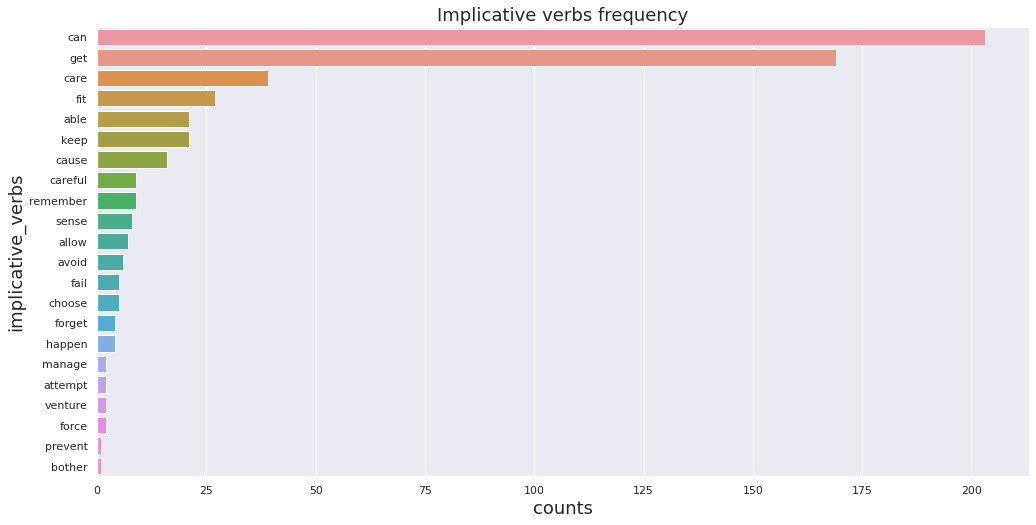

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','implicative_verbs','Implicative verbs frequency',True)

In [ ]:
counts = dict((stereo.loc[stereo['implicative_verbs']!= 0,'bias_type']).value_counts())

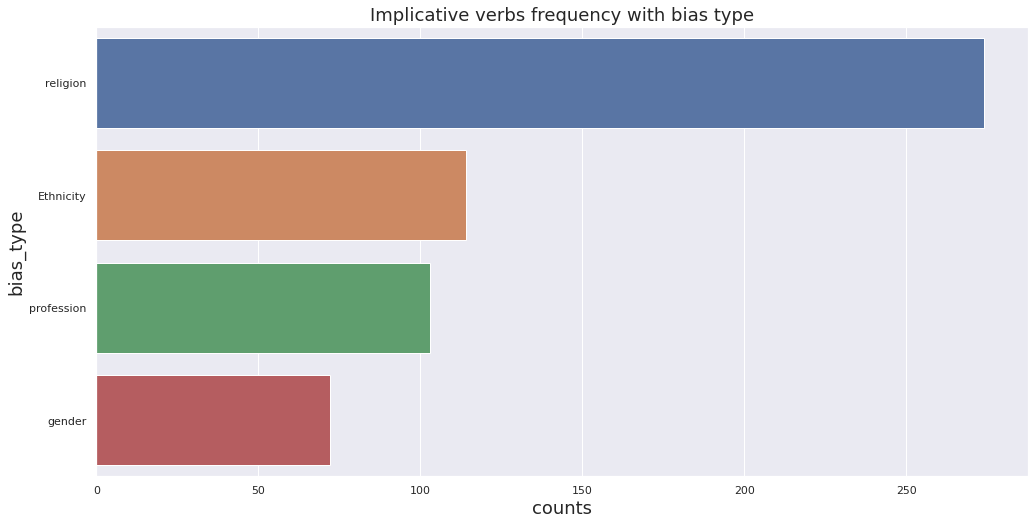

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','bias_type','Implicative verbs frequency with bias type',True)

#### Report_verbs

In [ ]:
lexicon = set(tokenize(lexicons['report_verbs.txt']))

In [ ]:
stereo['report_verbs'] = stereo['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((stereo.loc[stereo['report_verbs']!= 0,'report_verbs']).value_counts())

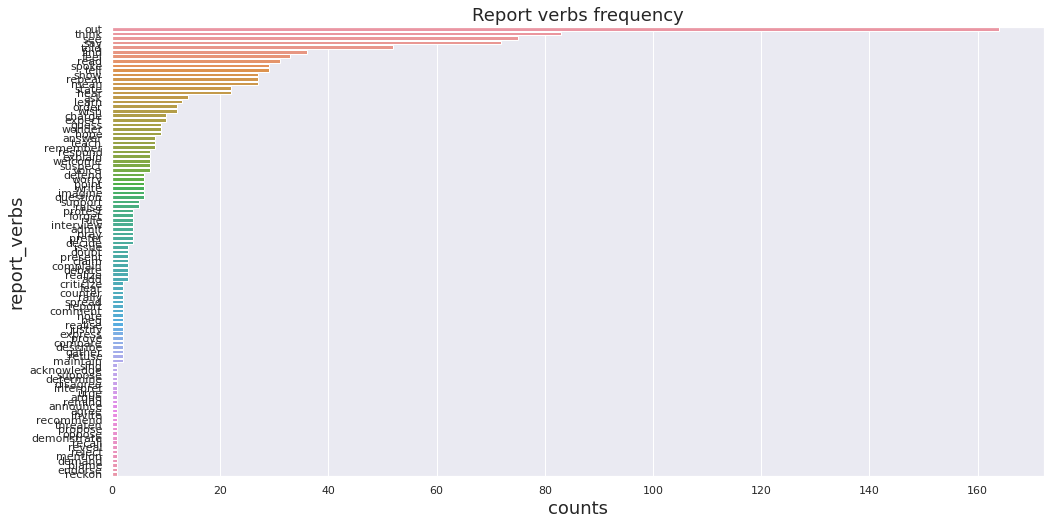

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','report_verbs','Report verbs frequency',True)

In [ ]:
counts = dict((stereo.loc[stereo['report_verbs']!= 0,'bias_type']).value_counts())

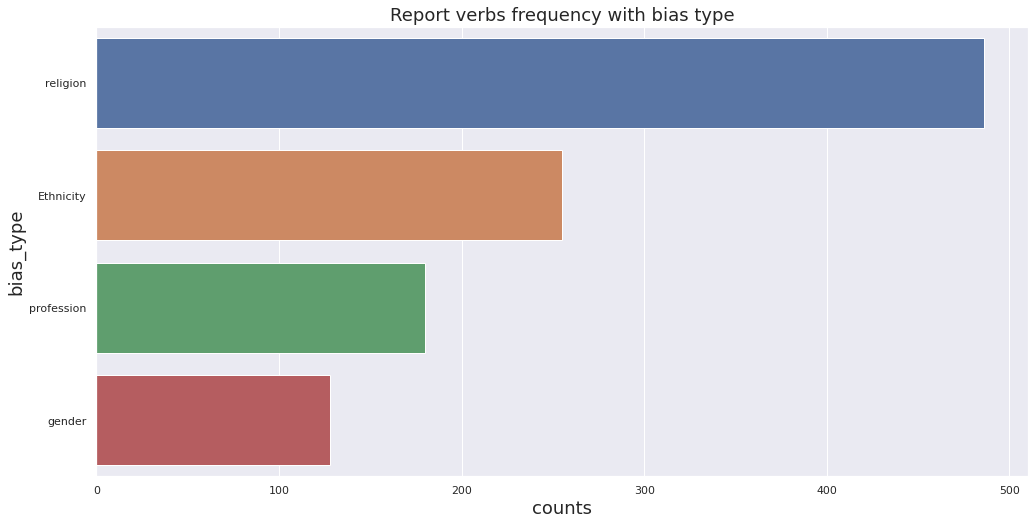

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','bias_type','Report verbs frequency with bias type',True)

#### bias_word_list_01_2018

In [ ]:
lexicon = set(tokenize(lexicons['bias_word_list_01_2018.txt']))

In [ ]:
stereo['bias_word_list_01_2018'] = stereo['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((stereo.loc[stereo['bias_word_list_01_2018']!= 0,'bias_type']).value_counts())

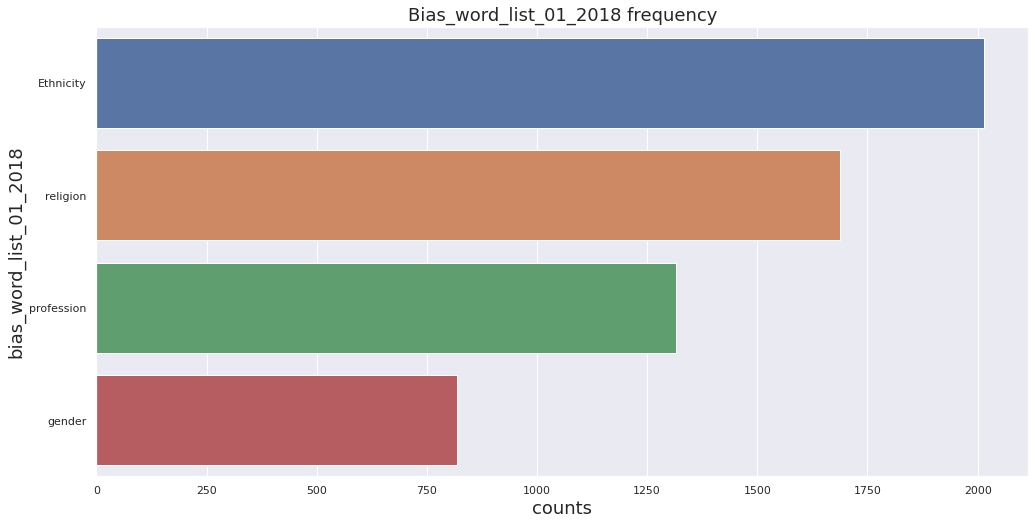

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','bias_word_list_01_2018','Bias_word_list_01_2018 frequency',True)

#### subjectivityClues_lexicon

In [ ]:
lexicon = set(tokenize(lexicons['subjectivityClues_lexicon.txt']))

In [ ]:
stereo['subjectivityClues_lexicon'] = stereo['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((stereo.loc[stereo['subjectivityClues_lexicon']!= 0,'bias_type']).value_counts())

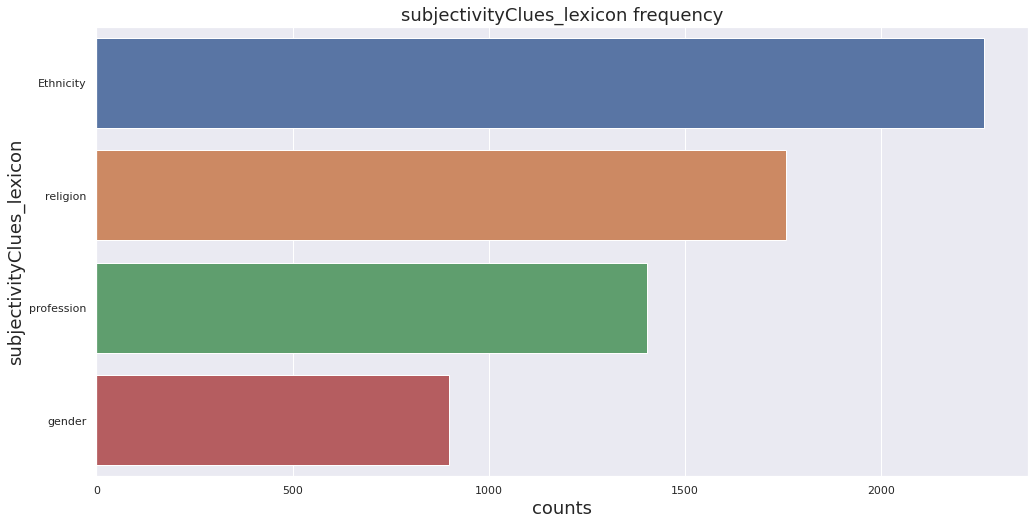

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','subjectivityClues_lexicon','subjectivityClues_lexicon frequency',True)

### TBD:
* Add bias type count per lexicon analysis

# TBD

* Rerun with new categorization 
* Define Implicit and explicit stereotypes with reference
* Subject and verb/adj relation extraction 
  * Analyze counts:
    * Descriptive action verbs ()
    * Interpretive action verbs
    * State verbs
    * Adjectives (More indicates more abstract which indicates either stereotype consistent or inconsistent behaviour)
* Define each category by analyzing the stats
  * Keywords
  * Word clouds 
  etc.
* Toxicity detection using detoxify
* Summary for each analysis 
* Bi-variate analysis 
  * Explore more variable/features to extract and analyze
